**Note to grader:** Each question is assigned with a score. The final score  will be (sum of actual scores)/(sum of maximum scores)*100. The grading rubrics are shown in the TA guidelines.

# **Assignment 2**

This assignment walks you through the basics of the perceptron. You will also do some first experiments on a toy data set, and check the effect of hyperparameters. The intended goal of the assignment is to familiarize you further with the Jupyter/Colab environment and help you acquire some tools that we will later use to experiment with 'professional-grade' data sets and algorithms.


<b>Note: </b> You must run/evaluate all cells. <b>Order of cell execution is important.<b>

## Preparation Steps

In [ ]:
# Import all necessary python packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
# Load data
from sklearn import datasets

# load iris dataset
iris = datasets.load_iris()
# Since this is a bunch, create a dataframe
df=pd.DataFrame(iris.data)
df['4']=iris.target
# {0:'setosa', 1:'versicolor', 2:'virginica'}
# df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'target']


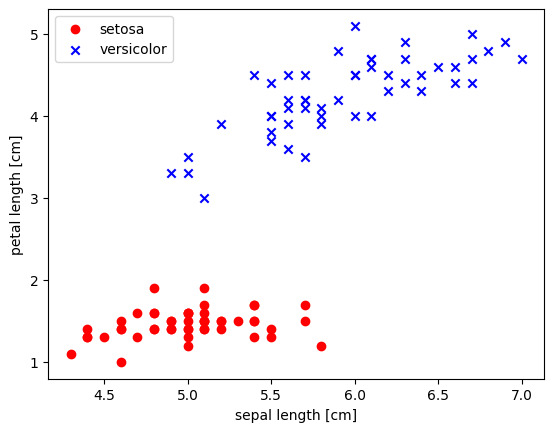

In [ ]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 0, -1, 1)

# extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_06.png', dpi=300)
plt.show()

-----------------------
-----------------------
-----------------------



## <font color='#008DFF'> **Question 0. Manual Perceptron Training (10 points)**

Below you can see the first 5 data points of the data set, all labeled as 'setosa'.

In [ ]:
X[0:5], y[0:5]

(array([[5.1, 1.4],
        [4.9, 1.4],
        [4.7, 1.3],
        [4.6, 1.5],
        [5. , 1.4]]),
 array([-1, -1, -1, -1, -1]))

Suppose the initial weights of the perceptron are $w0=0.1$, $w1=0.2$, $w2=-0.1 $. Here $w_0$ is the bias.

In the following space (Double click this text), write the weights after processing data points 0,1,2, and show your calculations (with $\eta = 0.1$):<br>
$w2 := w2 + \eta(y - yhat)*x2$<br>
$w1 := w1 + \eta(y -yhat)*x1$<br>
$w0 := w0 + \eta(y - yhat)$<br>
# Data point 0
y^hat=$w0 + w1 x1 + w2 x2 = 0.1 + 0.2*5.1 - 0.1*1.4=.99==1$

$w2 := -0.1 + 0.1(-1 - 1)*1.4 = -0.38$<br>
$w1 := 0.2 + 0.1(-1 - 1)*5.1 = -0.82$<br>
$w0 := 0.1 + 0.1(-1 - 1) = -0.1$<br>
# Data point 1
y^hat=$w0 + w1 x1 + w2 x2 = -0.1 + -0.82*4.9 + -0.38*1.4=-4.65==-1$

$w2 := -0.38 + 0.1(-1 - -1)*1.4 = -0.38$<br>
$w1 := -0.82 + 0.1(-1 - -1)*4.9 = -0.82$<br>
$w0 := -0.1 + 0.1(-1 - -1) = -0.1$<br>
# Data point 2
y^hat=$w0 + w1 x1 + w2 x2 = -0.1 + -0.82*4.7 + -0.38*1.3 =-4.448==-1$

$w2 := -0.38 + 0.1(-1 - -1)*1.3 = -0.38$<br>
$w1 := -0.82 + 0.1(-1 - -1)*4.7 = -0.82$<br>
$w0 := -0.1 + 0.1(-1 - -1) = -0.1$<br>

## Final Weights
$w2 := -0.38$<br>
$w1 := -0.82$<br>
$w0 := -0.1$<br>

<br>
<br>
<br><br><br><br>












In [ ]:
# Grader's area
import numpy as np
maxScore = 0

maxScore += 10
# acturalScore +=

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 1. Perceptron Code Modification (15 points)**

The following code is a perceptron implementation (with three do-nothing lines 59-61).

In [ ]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.
    niter_ : int
      Number of iterations it took to complete the perceptron

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.niter_ = 0
        self.errors_ = []
        self.weights_ = []
        self.weights_.append(self.w_)
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            #add the appended weight into an array
            self.weights_.append(self.w_)
            #the final array will have all weights appended in order
            #adding 1 to the number of iterations it actually took to complete the perceptron after each iteration
            self.niter_+=1
            #checking if that if there are no errors made then we do not need to make anymore iterations
            if(errors==0):
              return self
              #return self since we won't be making any more errors

            # my do-nothing code
            LW = 2020
            # my do-nothing code
        #print(self.weights_)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


Work on the above cell and modify the code so that:

(i) The fit function stops when no more iterations are necessary. <br>
(ii) The trained perceptron contains as an attribute not only its weights, but also the number of iterations it took for training <br>
(iii) The perceptron maintains a history of its weights, i.e. the set of weights after each point is processed.

To modify the code please insert your code with clear comments surrounding it, similarly to "my do-nothing code". Make sure you evaluate the cell again,  so that following cells will be using the modified perceptron.



In [ ]:
# Grader's area

maxScore += 15
# acturalScore +=

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question2: Experimenting with hyperparameters (15 points)**

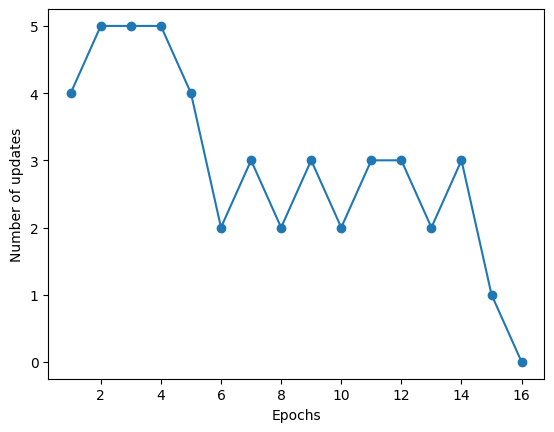

In [ ]:
ppn = Perceptron(eta=0.0001, n_iter=20, random_state=1)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')


plt.show()







Running the above code, you can verify if your modification in question 1 works correctly. The point of this question is to experiment with the different hyperparameters. Here are some specific questions:<br>
(i) Find the largest value of $\eta$ for which the process takes more than 20 iterations to converge. Explain how you found that $\eta$ <br>
(ii) Are you able to find $\eta>1$ for which the process fails to converge in less than 30 iterations? <br>
(iii) Find two different settings for the random state, that give different convergence patterns, for the same $\eta$.

Please give your answers in the cell below.

(i)Our original eta is 0.0001 with 20 iterations, however when I tested by increasing the eta to 0.00001 the number of iterations needed to be up to 40 iterations which doubled the number of iternations needed so I halved the eta to be 0.0005 and got it to be slighly over 20 iterations, and then I tested eta between 0.00005 and 0.000055 and got $\eta = 0.00005$ to be the best
<br>
(ii) I was unable to find any $\eta >1$ for which it cannot converge in less than 30 iterations, it seemed to always converge up 6 iterations
<br>
(iii) For my first test setting I had it at $\eta=0.00001, niter=50, random_state=1$ and it converged in 40 iterations. For my second test setting I had it at $\eta=0.00001, niter=50, randomstate=3 $ and it converged it in less iterations at 38.
<br>

In [ ]:
# Grader's area

maxScore += 15
# acturalScore +=

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 3: Visualizing multiple decision regions over time (10 points)**

Here is the function for visualizing decision regions

In [ ]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

<ipython-input-176-2dba8886e370>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


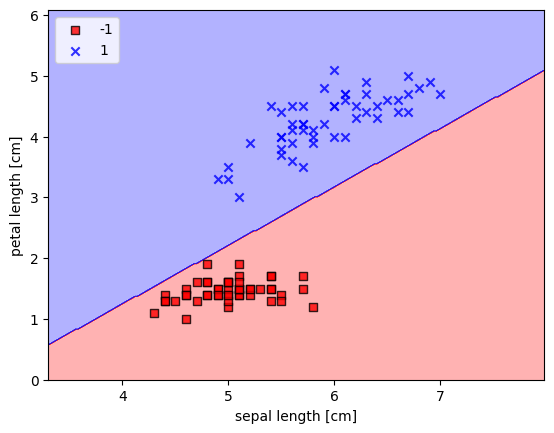

In [ ]:
#ppn = Perceptron(eta=0.01, n_iter=5, random_state=1)
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

Using the above, give code that plots the decision regions for the first 5 epochs. Use learning rate = 0.01 and random seed = 1 when applicable.

<ipython-input-176-2dba8886e370>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


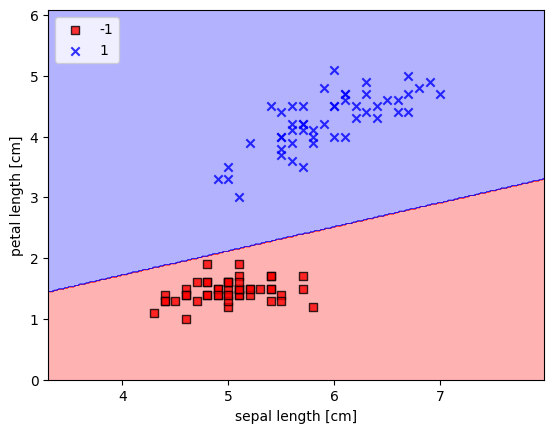

In [ ]:
ppn = Perceptron(eta=0.01, n_iter=5, random_state=1)
ppn.fit(X, y)

#ppn = Perceptron(eta=0.01, n_iter=5, random_state=1)
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

# ⬆ In the graph with the first 5 epochs we can the line become more horizontal compared to the original plot which had a more linear form line

In [ ]:
# Grader's area

maxScore += 10
# acturalScore +=


-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 4: Changing the data order in training (15 points)**



The data arrays (X,y) currently in the memory are organized so that the all data points with a given label (e.g. 'Setosa') lie in a contiguous part of the arrays (X,y). In this question we will check the impact of changing the order of the data in the number of iterations required to learn a correct perceptron.


The commented code below needs a small change in order to generate a random shuffle (also called permutation) of the data). Please look up the particular functions of the code, see how they work and then do the required modification and uncomment/evaluate the code.

In [ ]:
# establish a random shuffle
s = np.arange(100)
np.random.shuffle(s)
# shuffle sample
X_shuffle = X[s];
y_shuffle = y[s];

Modify the code below as follows: <br>
(i) Pick a sufficiently small $\eta$ so that convergences takes 20 iterations or more <br>
(ii) Add an extra line that fits the perceptron on the shuffled data <br>
(iii) Plot the error for both training processes (the original, and the shuffled ata)

What do you observe?

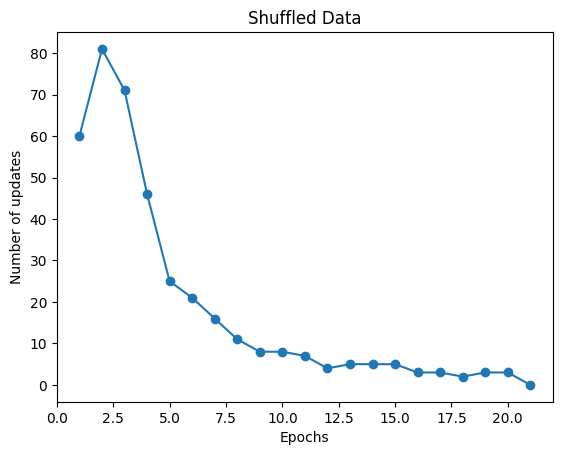

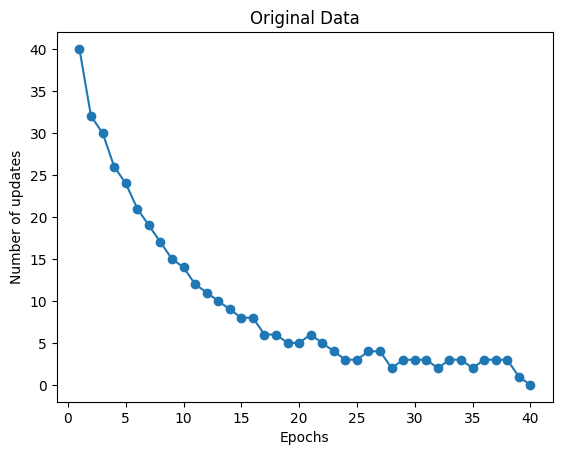

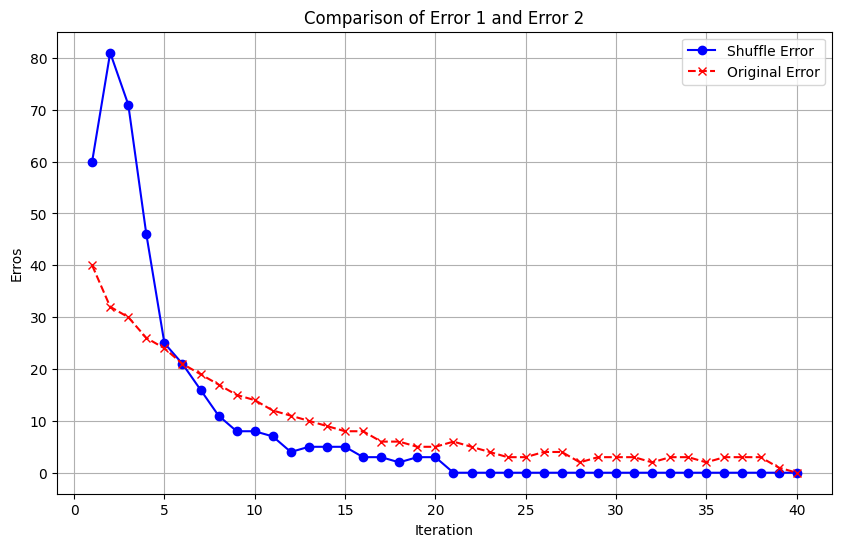

In [ ]:
#shuffled data with same eta so it takes more than 20 iterations
ppn = Perceptron(eta=0.00001, n_iter=100, random_state=1)
ppn.fit(X_shuffle, y_shuffle)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title("Shuffled Data")
plt.show()
#the original model with same eta as shuffled data
ppn1 = Perceptron(eta=0.00001, n_iter=100, random_state=1)
ppn1.fit(X, y)
plt.plot(range(1, len(ppn1.errors_) + 1), ppn1.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title("Original Data")
plt.show()

#getting the length of both errors to be the same size
for i in range(19):
  ppn.errors_.append(0)
x = range(1, len(ppn1.errors_) + 1)
plt.figure(figsize=(10, 6))
plt.plot(x, ppn.errors_, label='Shuffle Error', marker='o', linestyle='-', color='blue')
plt.plot(x, ppn1.errors_, label='Original Error', marker='x', linestyle='--', color='red')
plt.xlabel('Iteration')
plt.ylabel('Erros')
plt.title('Comparison of Error 1 and Error 2')
plt.legend()
plt.grid(True)
plt.show()

-- So in my code made sure the eta and random state and number of iterations was the same for the shuffled data and original data and plotted the result of both.<br> I then plotted the lines together to compare the shuffle and original and can notice that the shuffled converged faster but started with a higher error for the early iterations.
<br>
<br>
<br>

In [ ]:
# Grader's area

maxScore += 15
# acturalScore +=

-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 5: Understanding linear transformations (20 points)**

Suppose we have a 2-dimensional data set. Then we transform each data point $X_j = (X_{j,1}, X_{j,2})$ as follows: $\tilde{X_j} = ( a X_{j,1} - c, b X_{j,2}-c)$, where $a,b,c$ are constant numbers. This is a linear transformation, because our transformed data comes from simple operations that use 'first powers' of the original data.


If our given data set is linearly separable, is the same true for the transformed one? In the following cells you can plot a transformed version of the Iris dataset, so that you see how it behaves (for your choice of $a, b, c$.) But you should also try and justify your answer in a theoretical way: if there exists a  'good' perceptron for the original data set, what would be the weights for the perceptron that works on the transformed set?

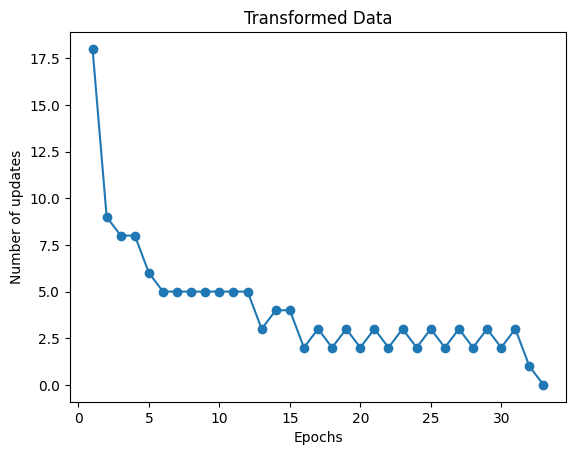

In [ ]:
#To give a linear transformation to X we can multiply it by a transformation matrix
tm = np.array([[3,0],[0,2]])
transformed_x = np.dot(X,tm)
ppn = Perceptron(eta=0.00001, n_iter=50, random_state=1)
ppn.fit(transformed_x, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title("Transformed Data")
plt.show()

In [ ]:
# Grader's area

maxScore += 20
# acturalScore +=


-----------------------
-----------------------
-----------------------


## <font color='#008DFF'> **Question 6: Linear regression with numpy 1-liners (15 points)**

In [ ]:
# here we initialize a random data matrix X and random numerical labels y
import numpy as np

X = np.random.randn(10,3)
y = np.random.randn(10,1)

# we also initialize a hypothetical hyperplane defined by w and b
w = np.random.randn(1,3)
b = -1
print(w)


[[-0.00401352 -0.16153781 -0.44915709]]


In [ ]:
# (i) find the numerical labels predicted by the model (w,b) for the points in X
#     your code should be a single numpy line
#     hint: we wrote this equation for a single point x in class
#           try to generalize it by expressing everying in terms of matrices

# your code goes here
y_predicted = np.dot(X,w.T) + b


In [ ]:
# (ii) find the updated weights after one application of gradient descent with lr = 0.1
#      your code should be a single numpy line
w = w - 0.1*((2/len(X))*np.dot((y-y_predicted).T,X))
print(w)



[[0.87006843 1.1654921  0.05516659]]


In [ ]:
# Grader's area

maxScore += 15
# acturalScore +=


-----------------------
-----------------------
-----------------------


In [ ]:
#Grader's area

score = actualScore*100/maxScore

NameError: ignored